In [2]:
from glob import glob
from os.path import basename
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import re

In [3]:
%matplotlib inline

In [4]:
def get_dssp(fn):
    f = open(DATA_PATH+"/dssp/"+fn)
    _ = f.readline()
    dssp = f.readline()
    f.close()
    return [m.group(0) for m in re.finditer(r"(.)\1*", dssp)]
    

In [5]:
def get_stride(fn):
    f = open(DATA_PATH+"/stride/"+fn)
    _ = f.readline()
    stride = f.readline()
    f.close()
    return [m.group(0) for m in re.finditer(r"(.)\1*", stride)]

In [6]:
def get_kaksi(fn):
    f = open(DATA_PATH+"/kaksi/"+fn)
    _ = f.readline()
    kaksi = f.readline()
    f.close()
    return [m.group(0) for m in re.finditer(r"(.)\1*", kaksi)]
    

In [7]:
def get_pross(fn):
    f = open(DATA_PATH+"/pross/"+fn)
    _ = f.readline()
    pross = f.readline()
    f.close()
    return [m.group(0) for m in re.finditer(r"(.)\1*", pross)]
    

In [81]:
DATA_PATH="/home/jgcarvalho/zeca-analyse-pos_quali/Top8000-best_hom50_pdb_chain/cba_times_mcc/rose_special_charged/run_10000"
segs_dssp = []
segs_stride = []
segs_kaksi = []
segs_pross = []
segs = []
for fn in glob(DATA_PATH+"/seq/*"):
    f = basename(fn)
    dssp = get_dssp(f)
    stride = get_stride(f)
    kaksi = get_kaksi(f)
    pross = get_pross(f)
    segs += [{"Method":"DSSP","File":f,"Segment":x,"Length":len(x)} for x in dssp]
#     segs += segs_dssp
    segs += [{"Method":"STRIDE","File":f,"Segment":x,"Length":len(x)} for x in stride]
#     segs += segs_stride
    segs += [{"Method":"KAKSI","File":f,"Segment":x,"Length":len(x)} for x in kaksi]
#     segs += segs_kaksi
    segs += [{"Method":"PROSS","File":f,"Segment":x,"Length":len(x)} for x in pross]
#     segs += segs_pross
pd_dssp = pd.DataFrame(segs_dssp)
pd_stride = pd.DataFrame(segs_stride)
pd_kaksi = pd.DataFrame(segs_kaksi)
pd_pross = pd.DataFrame(segs_pross)
pd_segs = pd.DataFrame(segs)



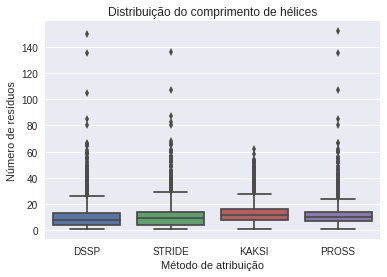

In [107]:
fig = sns.boxplot(x="Method", y="Length", data=pd_segs[pd_segs['Segment'].str.contains('H')])
fig.set(xlabel='Método de atribuição', ylabel='Número de resíduos',title="Distribuição do comprimento de hélices")
fig.figure.savefig("../figures/distribuicao_comprimento_helices.pdf")


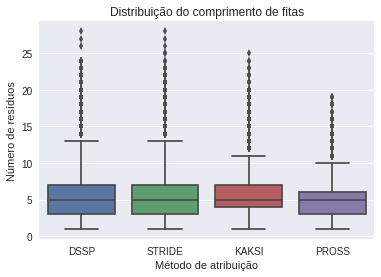

In [108]:
fig = sns.boxplot(x="Method", y="Length", data=pd_segs[pd_segs['Segment'].str.contains('E')])
fig.set(xlabel='Método de atribuição', ylabel='Número de resíduos',title="Distribuição do comprimento de fitas")
fig.figure.savefig("../figures/distribuicao_comprimento_fitas.pdf")

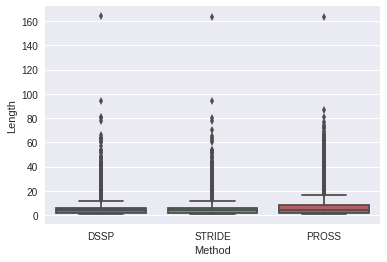

In [97]:
sns.boxplot(x="Method", y="Length", data=pd_segs[(pd_segs['Segment'].str.contains('C')) & (pd_segs['Method']!="KAKSI")])

In [98]:
pd_segs[pd_segs['Segment'].str.contains('C')].sort_values(by="Length", ascending=False)

,File,Length,Method,Segment
753554,2p4eP,546,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
789573,3jzyA,386,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
995619,2j8kA,168,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
995610,2j8kA,164,DSSP,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
995623,2j8kA,163,PROSS,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
608709,1h6wA,163,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
995615,2j8kA,163,STRIDE,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
889296,3evyB,148,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
702884,2wy3A,144,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
781097,1me8A,137,KAKSI,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...


In [91]:
pd_segs[pd_segs['Segment'].str.contains('E')].sort_values(by="Length", ascending=False)

,File,Length,Method,Segment
930498,1czfA,28,DSSP,EEEEEEEEEEEEEEEEEEEEEEEEEEEE
508726,1uu4A,28,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEEEEE
863986,1h4gA,27,DSSP,EEEEEEEEEEEEEEEEEEEEEEEEEEE
864016,1h4gA,27,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEEEE
976617,2x55A,26,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEEE
976585,2x55A,26,DSSP,EEEEEEEEEEEEEEEEEEEEEEEEEE
1021210,1oa2C,25,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEE
251070,3isrA,25,KAKSI,EEEEEEEEEEEEEEEEEEEEEEEEE
438173,3g5kD,25,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEE
882402,1jpeA,25,STRIDE,EEEEEEEEEEEEEEEEEEEEEEEEE


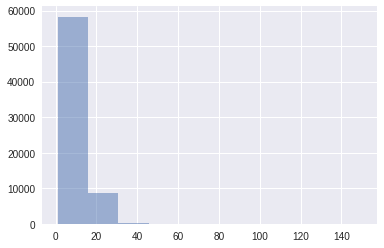

In [46]:
pd_dssp[pd_dssp['Segment'].str.contains('H')]["Length"].hist(alpha=0.5)

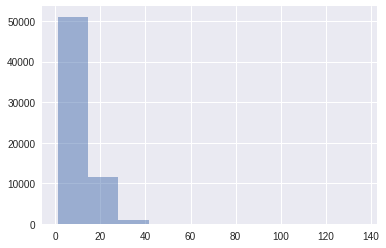

In [47]:
pd_stride[pd_stride['Segment'].str.contains('H')]["Length"].hist(alpha=0.5)

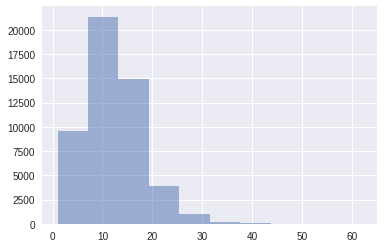

In [48]:
pd_kaksi[pd_kaksi['Segment'].str.contains('H')]["Length"].hist(alpha=0.5)

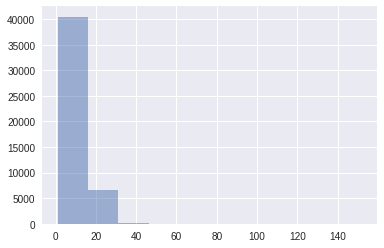

In [49]:
pd_pross[pd_pross['Segment'].str.contains('H')]["Length"].hist(alpha=0.5)

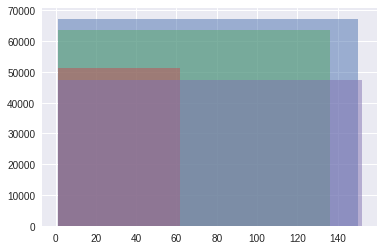

In [73]:
pd_dssp[pd_dssp['Segment'].str.contains('H')]["Length"].hist(alpha=0.5, bins=1)
pd_stride[pd_stride['Segment'].str.contains('H')]["Length"].hist(alpha=0.5, bins=1)
pd_kaksi[pd_kaksi['Segment'].str.contains('H')]["Length"].hist(alpha=0.5, bins=1)
pd_pross[pd_pross['Segment'].str.contains('H')]["Length"].hist(alpha=0.5, bins=1)

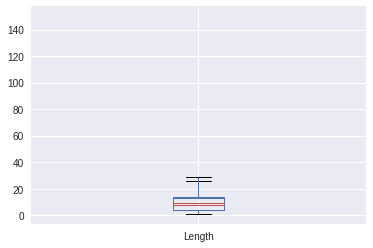

In [76]:
pd_dssp[pd_dssp['Segment'].str.contains('H')].boxplot()
pd_stride[pd_stride['Segment'].str.contains('H')].boxplot()

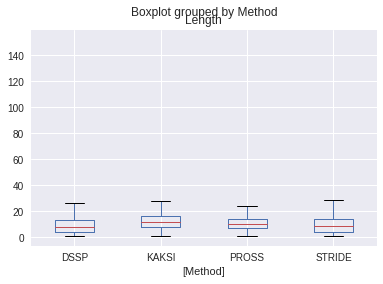

In [82]:
pd_segs[pd_segs['Segment'].str.contains('H')].boxplot(by="Method")

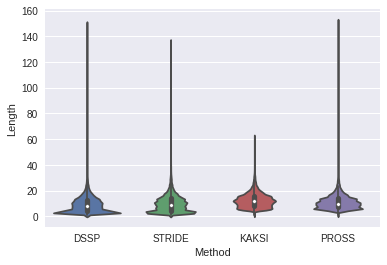

In [83]:
sns.violinplot(x="Method", y="Length", data=pd_segs[pd_segs['Segment'].str.contains('H')])

In [67]:
pd_stride[pd_stride['Segment'].str.contains('H')].count()

File       63666
Length     63666
Method     63666
Segment    63666
dtype: int64

In [69]:
pd_kaksi[pd_kaksi['Segment'].str.contains('C')].count()

File       122311
Length     122311
Method     122311
Segment    122311
dtype: int64

In [61]:
pd_pross[pd_pross['Segment'].str.contains('H')].count()

File       47346
Length     47346
Method     47346
Segment    47346
dtype: int64